In [1]:
import tensorflow as tf
from tensorflow.contrib.framework.python.ops.variables import get_or_create_global_step
from load_data.load_data import get_split, load_batch
from network.inception_resnet_v2 import inception_resnet_v2_arg_scope, inception_resnet_v2
from loss import get_constraint_loss
from param import *

import matplotlib.pyplot as plt

import time
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
slim = tf.contrib.slim

checkpoint_file = tf.train.latest_checkpoint(log_dir)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
image_file_name = "../data/images/0062781.jpg"
image_raw_data = tf.gfile.FastGFile(image_file_name, 'r').read()
with tf.Graph().as_default() as graph:
    image_data = tf.image.decode_jpeg(image_raw_data)
    images = tf.expand_dims(image_data, axis=0)
    if images.dtype != tf.float32:
        images = tf.image.convert_image_dtype(images, dtype=tf.float32)
    images.set_shape([1,299,299,3])

    with slim.arg_scope(inception_resnet_v2_arg_scope()):
        end_points = inception_resnet_v2(images, num_classes=100, is_training=False)
        end_points['group_all'] = tf.concat([end_points['group_0'],end_points['group_1'],end_points['group_2'],end_points['group_3']],axis=3)

    c_loss = get_constraint_loss(end_points)
        
    variables_to_restore = slim.get_variables_to_restore()
    saver = tf.train.Saver(variables_to_restore)
    def restore_fn(sess):
        return saver.restore(sess, checkpoint_file)

    sv = tf.train.Supervisor(logdir = None, summary_op = None, init_fn = restore_fn)

    with sv.managed_session() as sess:
        raw_images, imgs_matrix = sess.run([images, end_points['group_all']])

ValueError: Cannot reshape a tensor with 1156 elements to shape [16,289,4] (18496 elements) for 'Reshape' (op: 'Reshape') with input shapes: [1,17,17,4], [3] and with input tensors computed as partial shapes: input[1] = [16,289,4].

In [3]:
print raw_images.shape, imgs_matrix.shape

(1, 299, 299, 3) (1, 17, 17, 4)


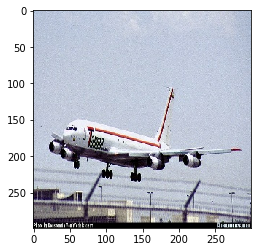

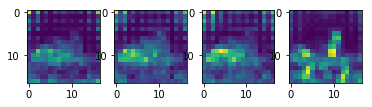

In [4]:
index = 0
plt.imshow(raw_images[0,:,:,:])
plt.show()
for i in range(4):
    plt.subplot(140 + i+1)
    plt.imshow(imgs_matrix[index, :, :, i])
plt.show()

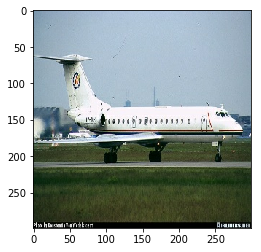

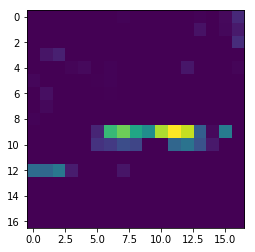

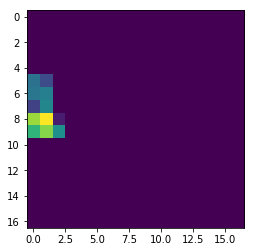

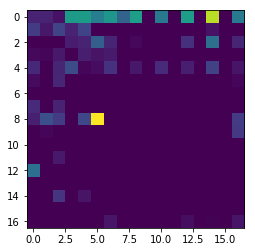

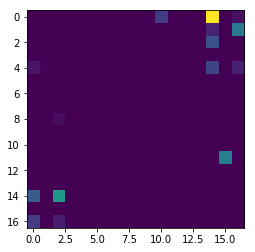

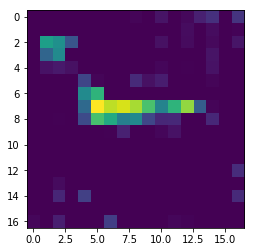

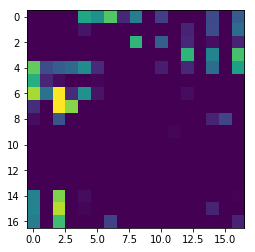

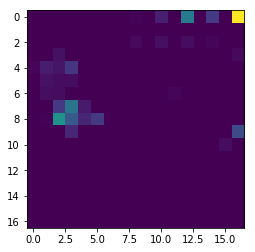

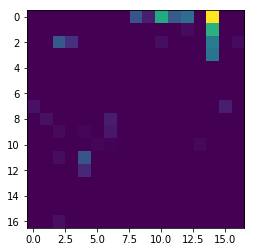

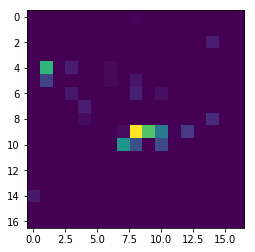

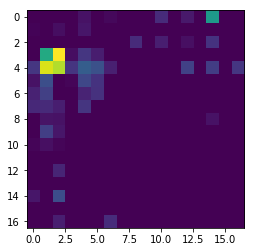

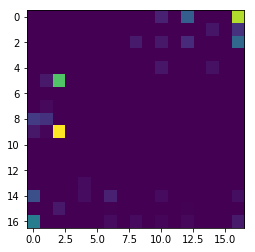

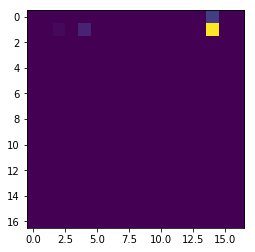

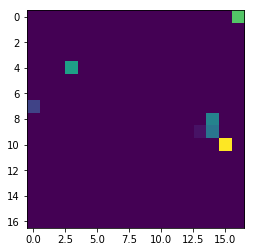

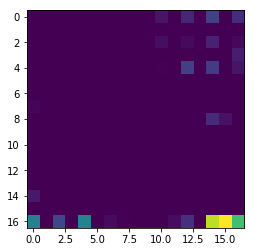

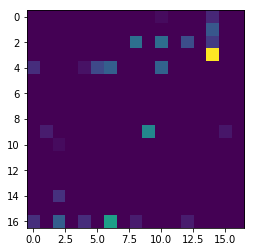

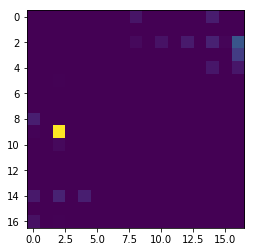

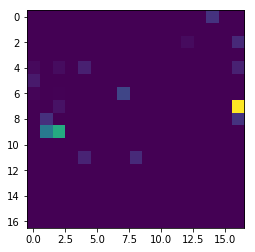

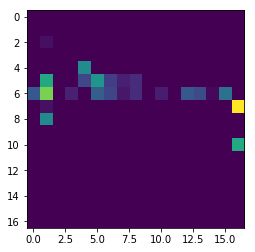

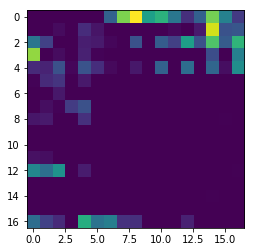

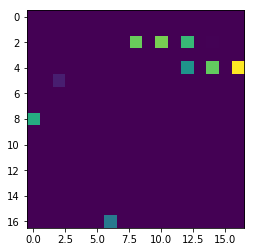

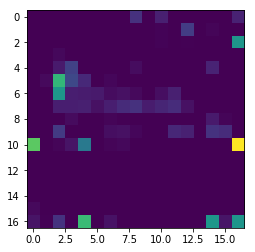

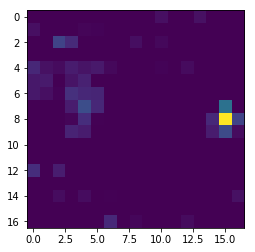

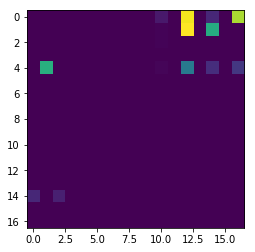

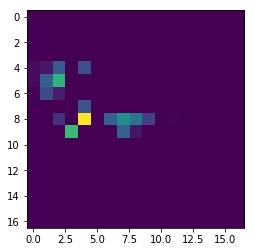

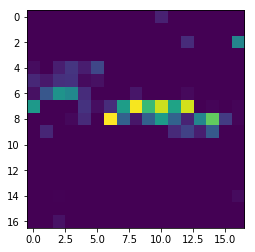

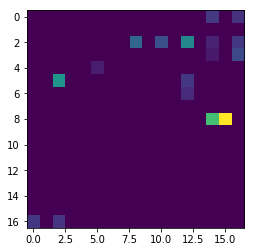

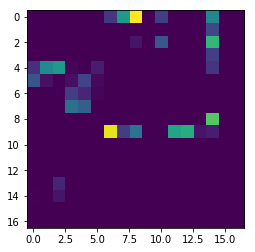

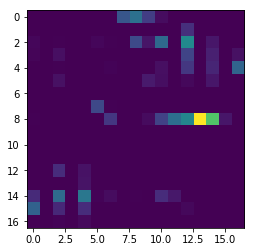

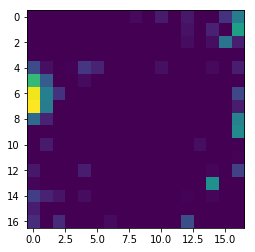

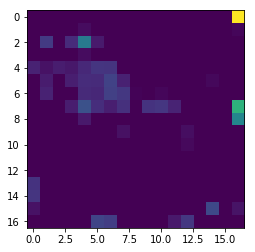

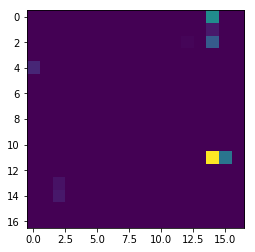

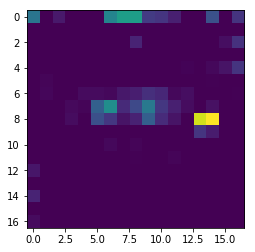

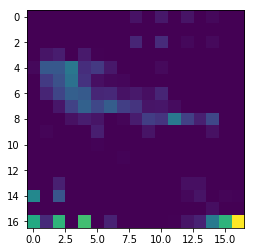

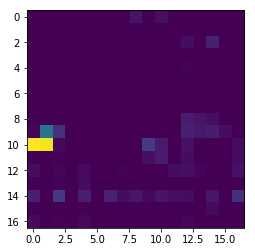

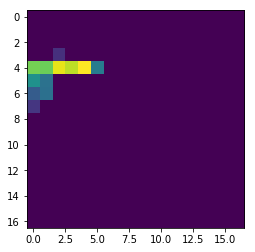

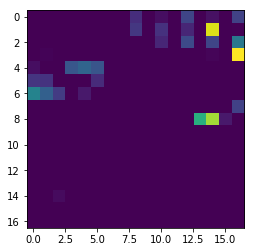

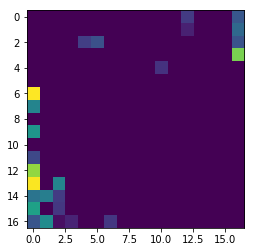

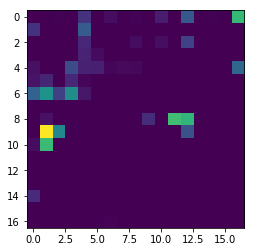

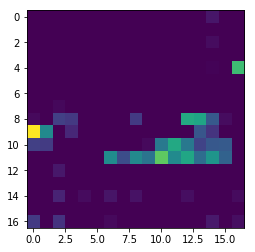

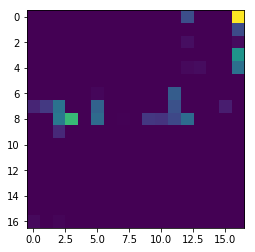

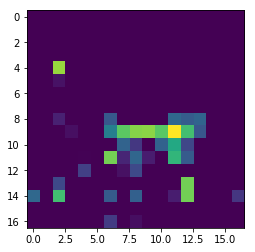

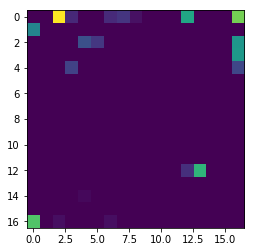

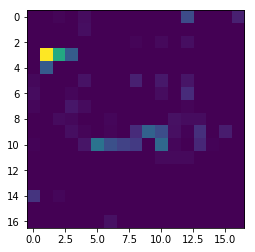

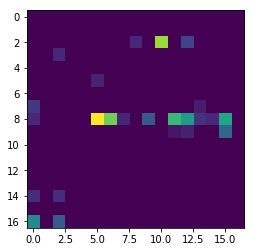

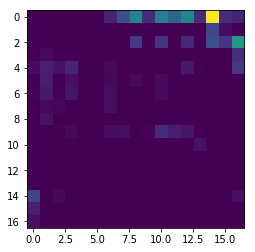

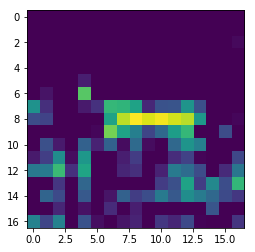

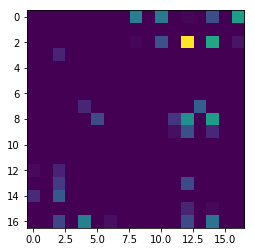

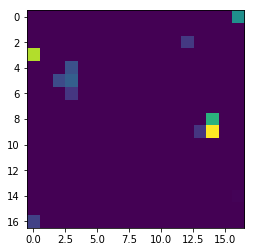

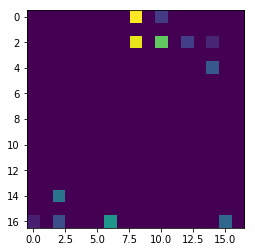

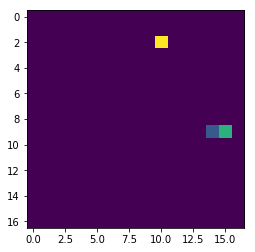

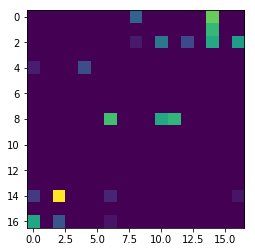

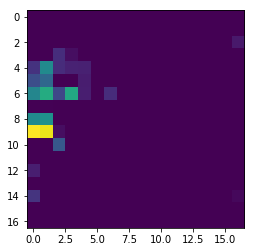

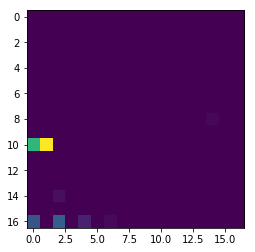

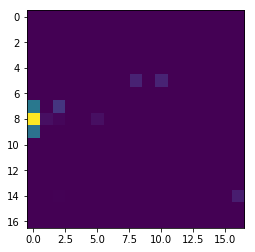

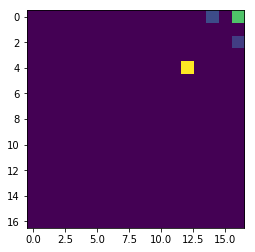

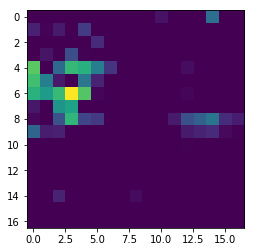

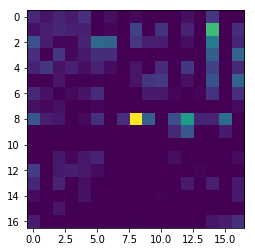

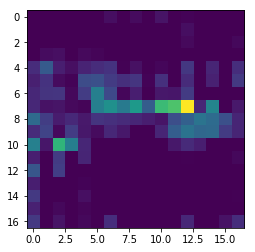

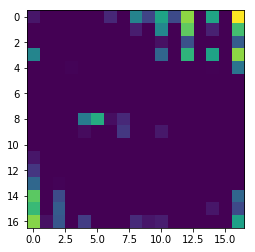

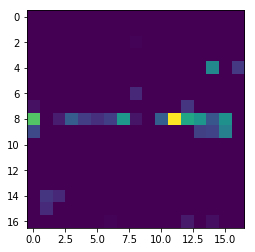

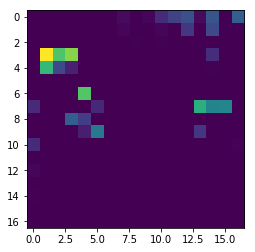

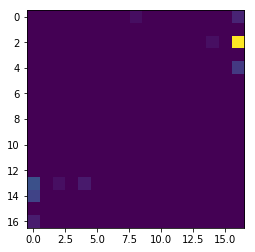

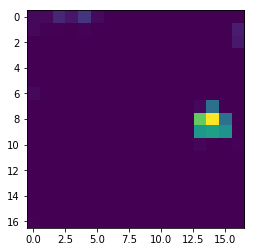

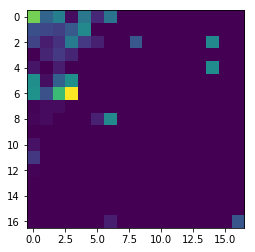

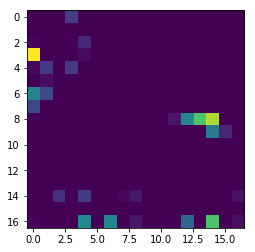

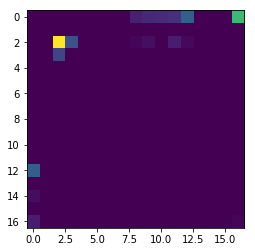

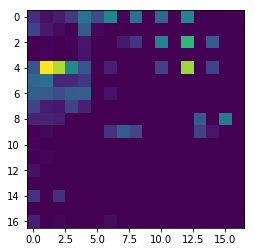

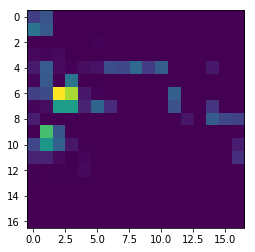

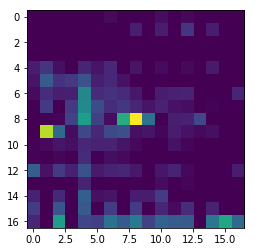

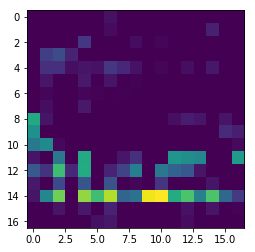

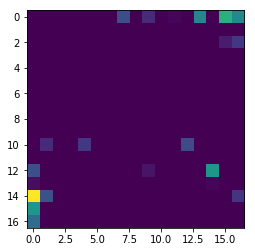

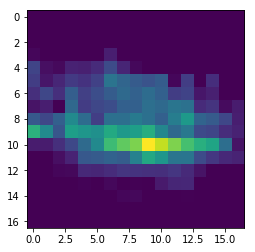

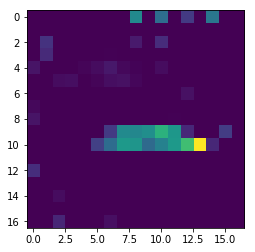

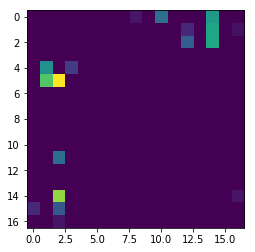

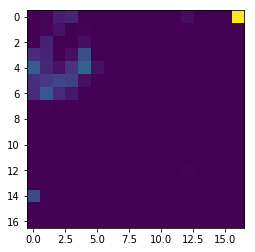

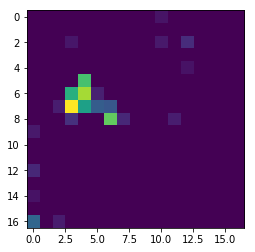

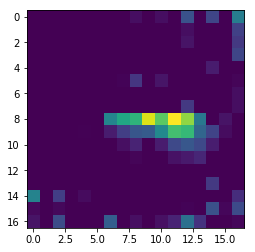

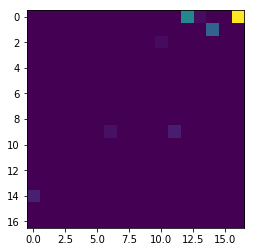

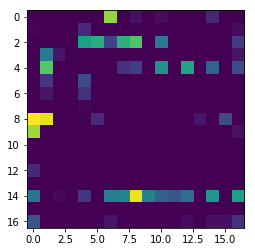

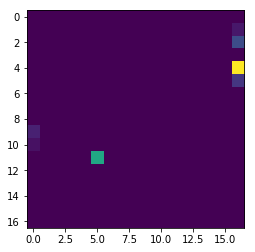

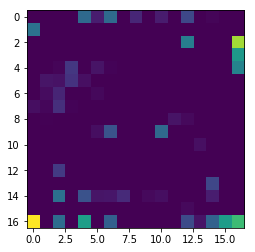

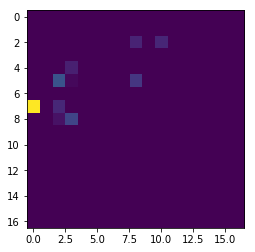

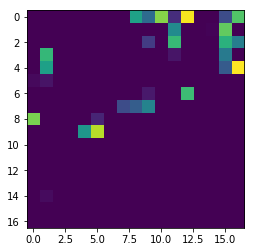

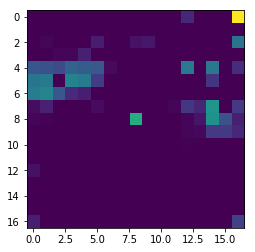

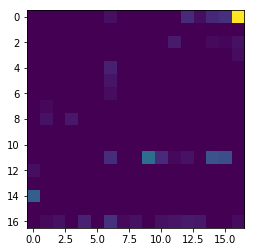

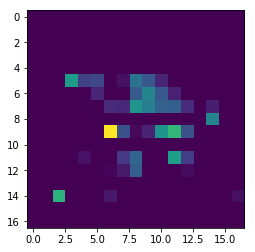

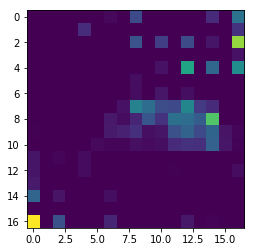

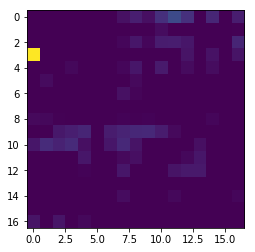

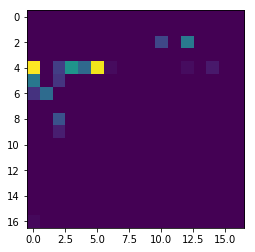

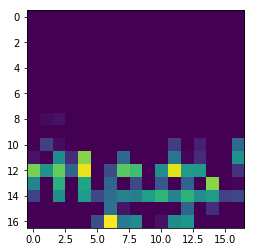

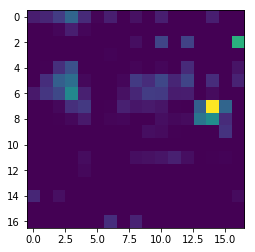

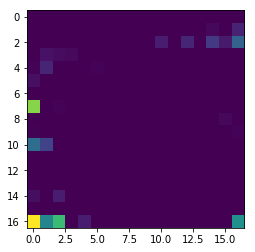

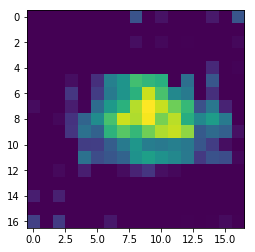

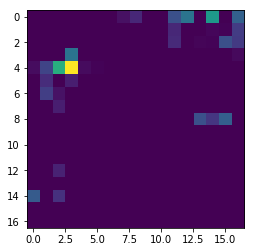

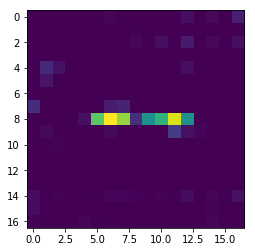

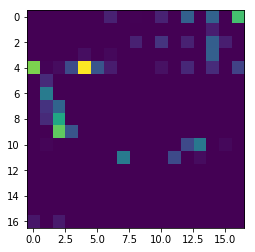

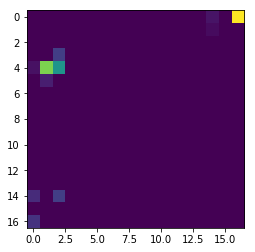

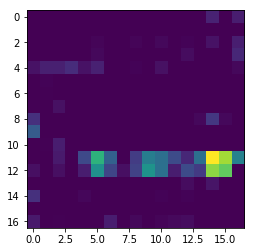

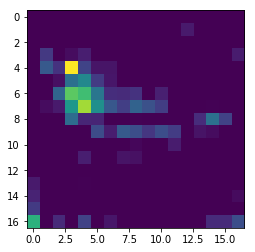

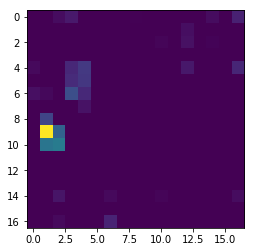

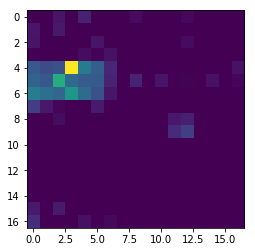

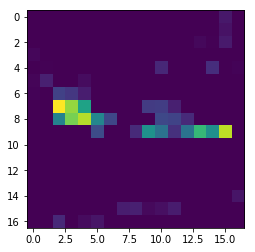

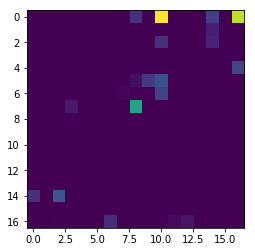

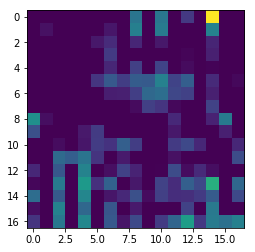

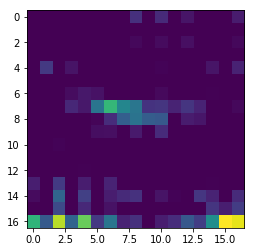

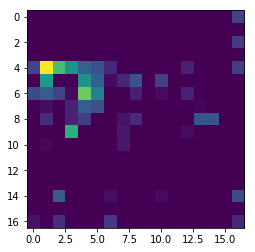

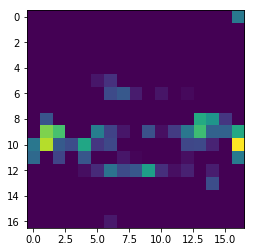

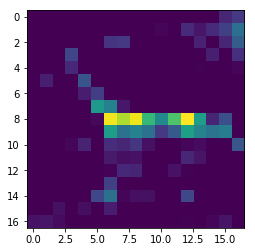

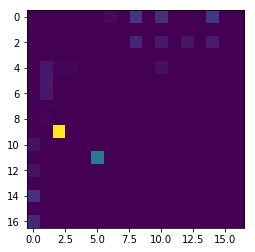

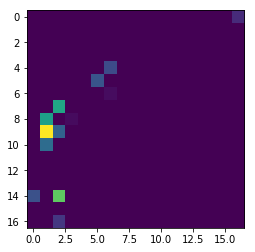

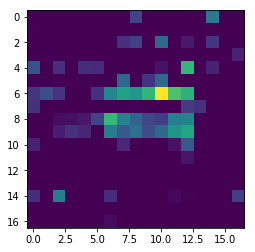

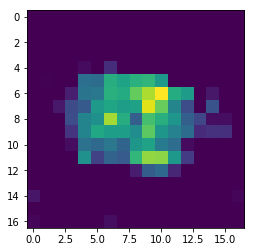

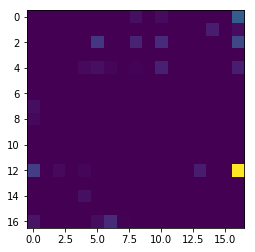

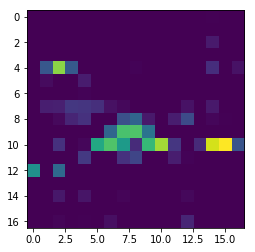

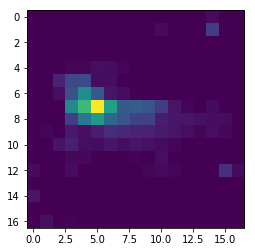

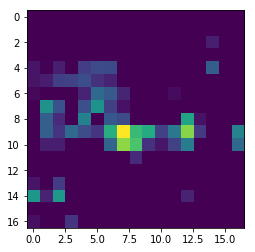

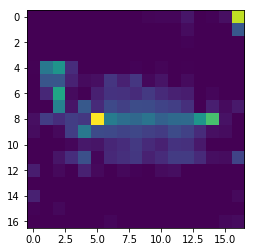

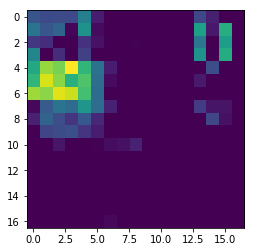

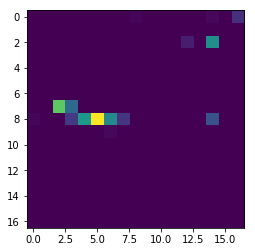

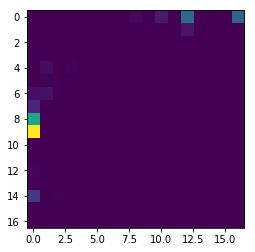

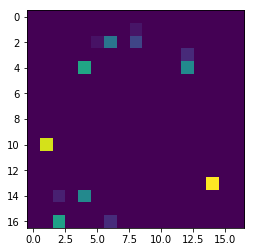

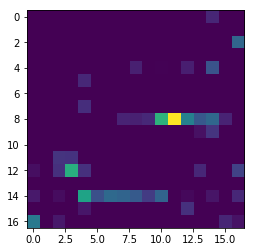

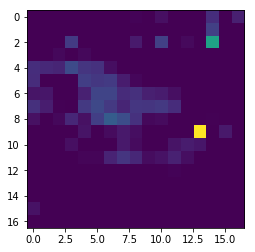

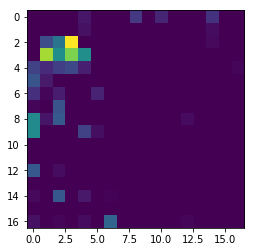

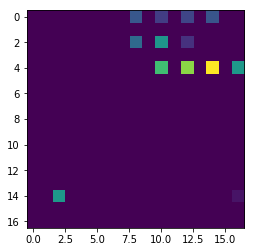

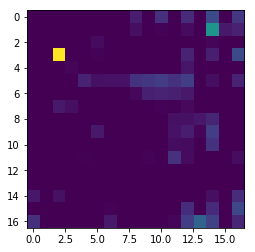

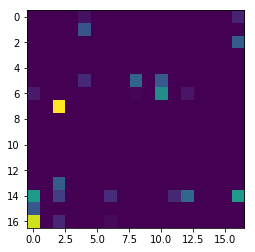

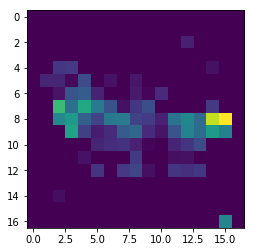

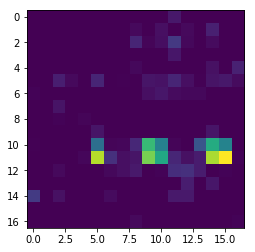

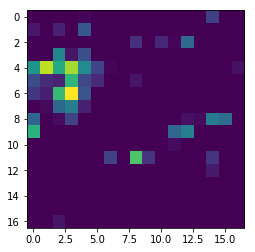

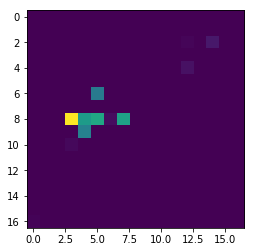

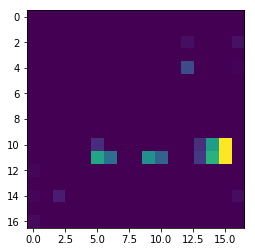

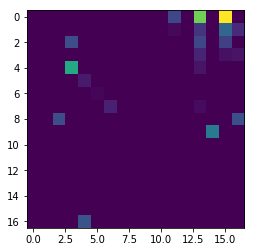

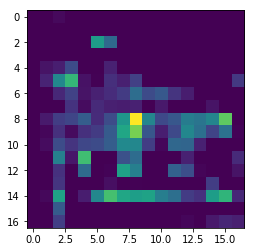

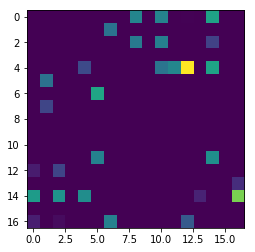

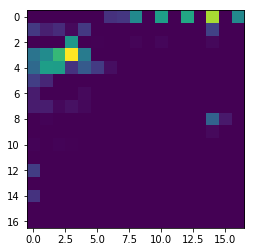

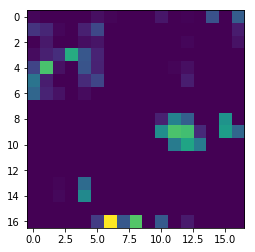

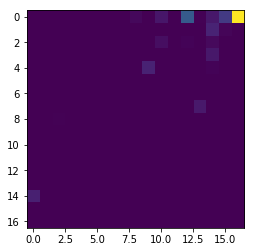

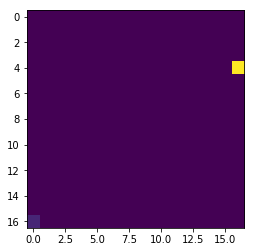

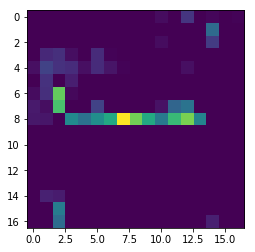

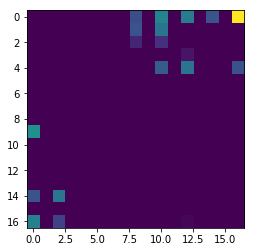

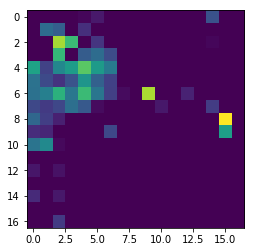

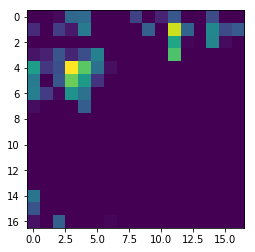

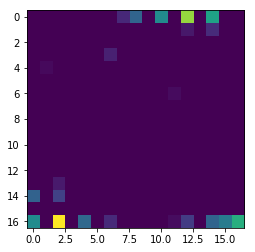

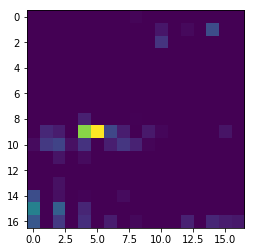

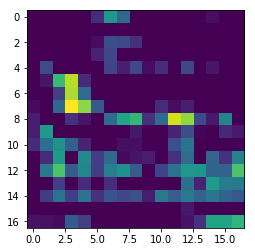

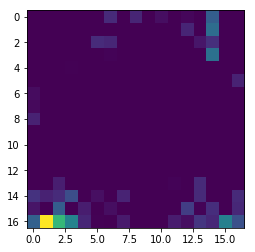

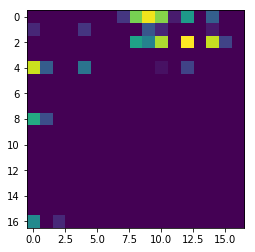

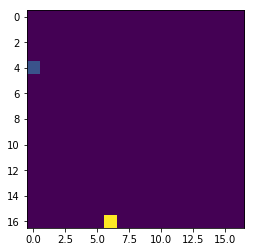

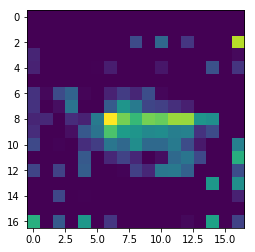

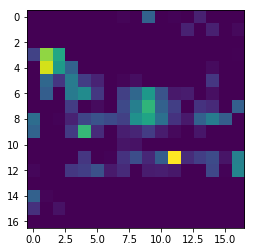

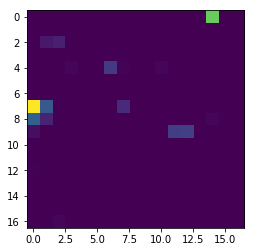

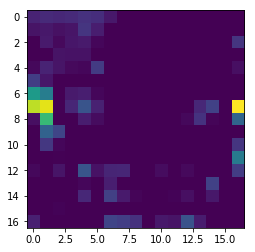

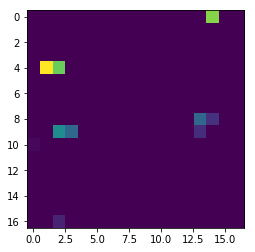

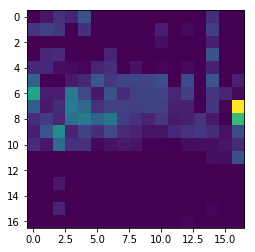

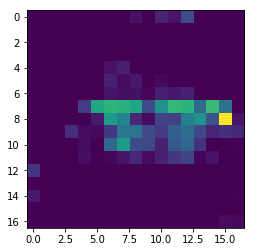

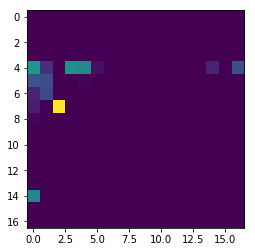

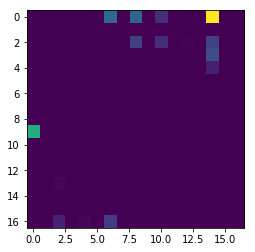

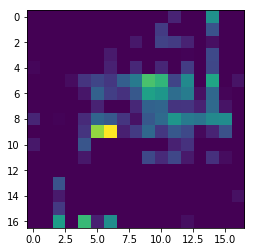

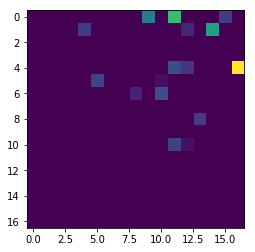

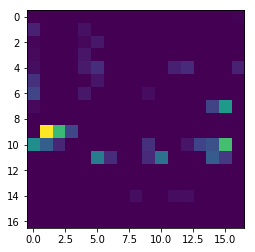

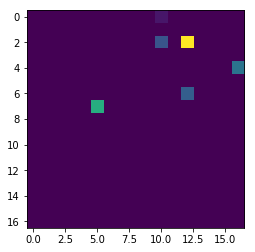

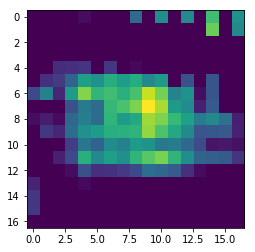

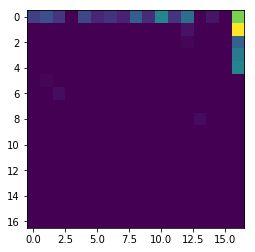

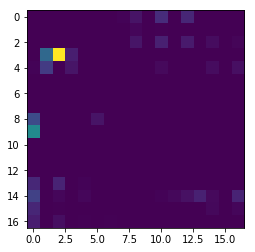

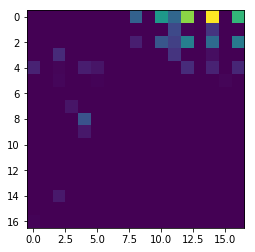

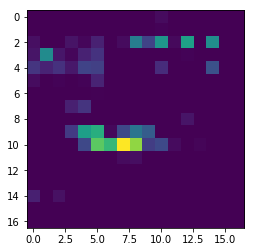

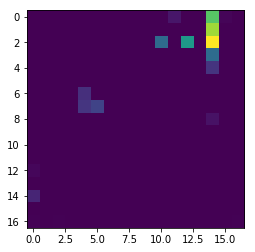

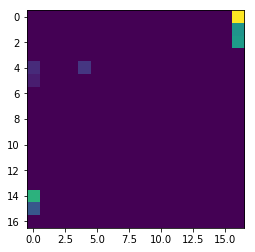

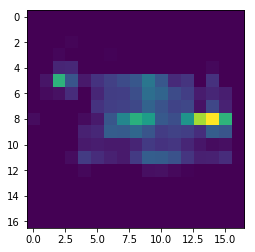

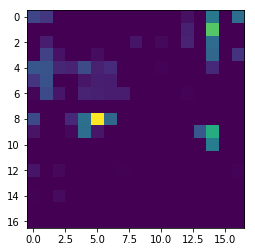

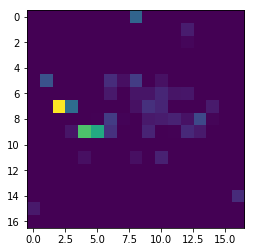

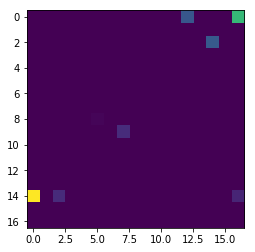

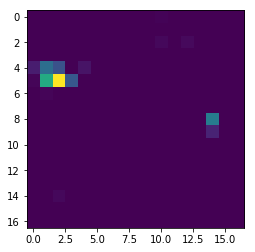

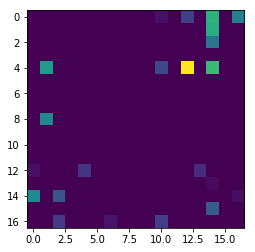

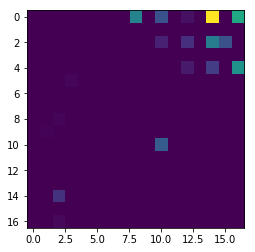

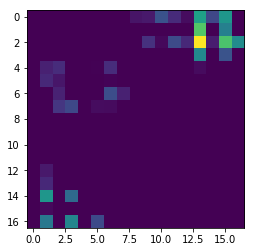

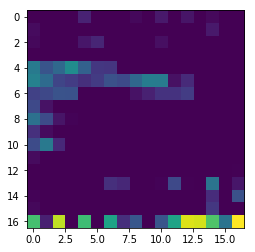

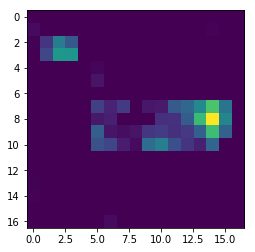

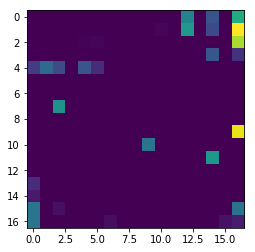

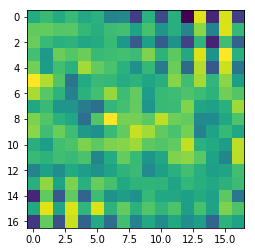

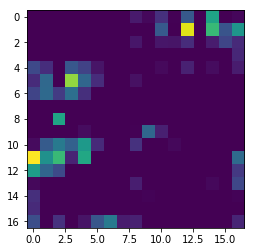

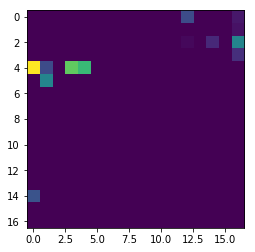

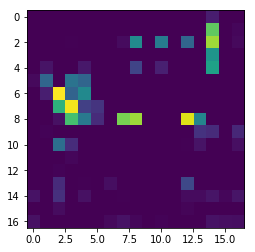

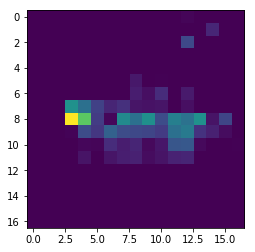

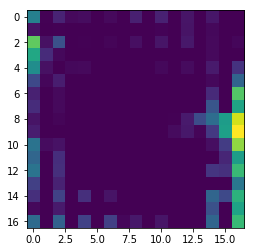

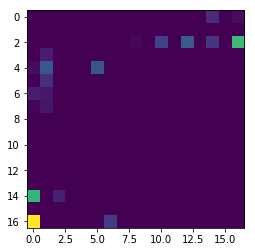

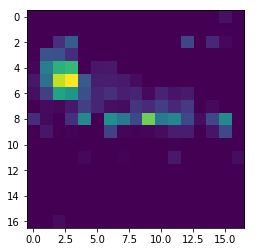

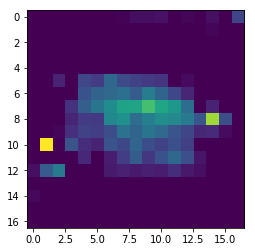

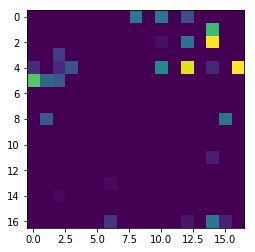

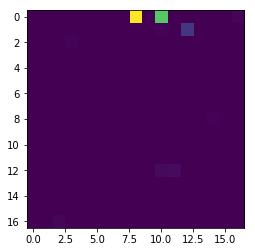

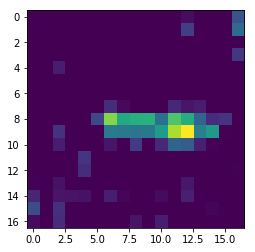

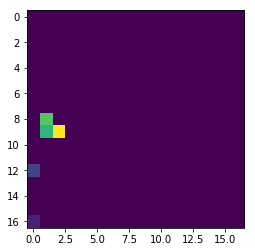

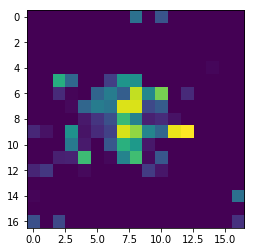

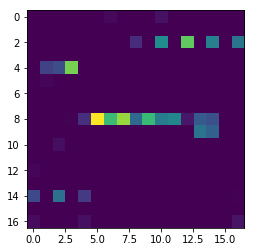

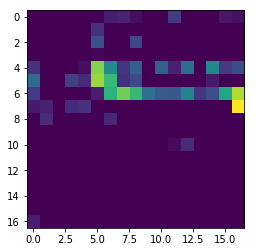

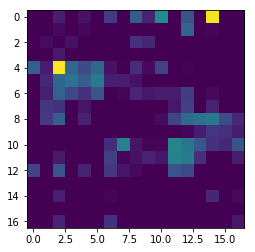

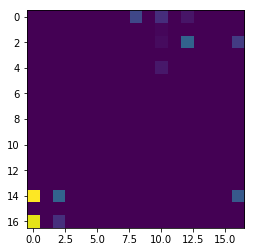

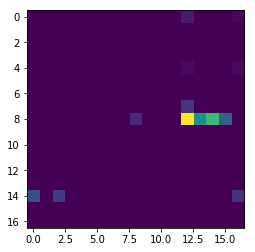

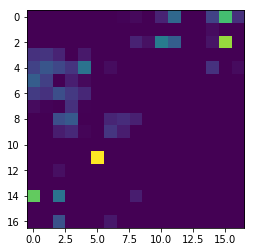

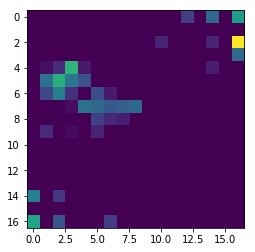

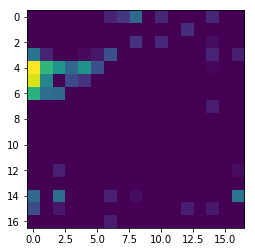

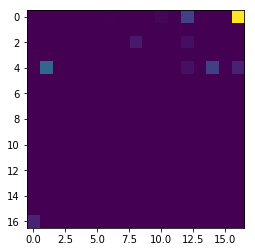

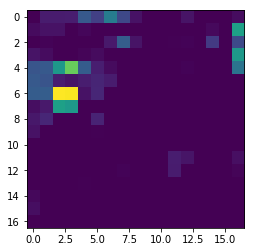

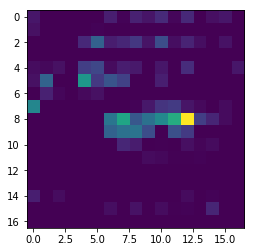

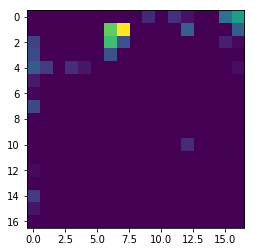

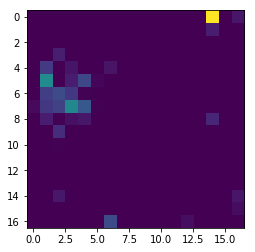

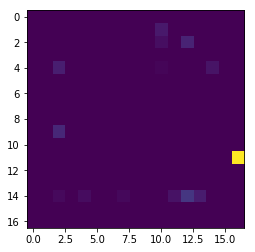

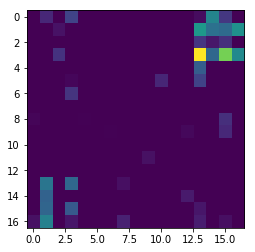

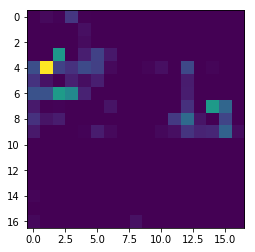

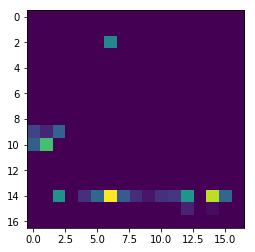

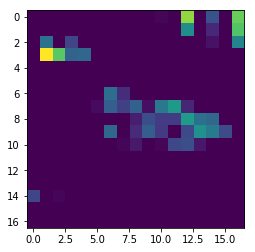

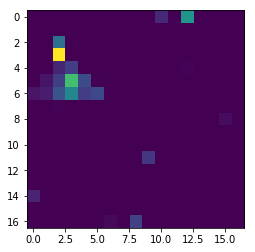

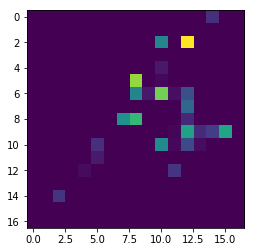

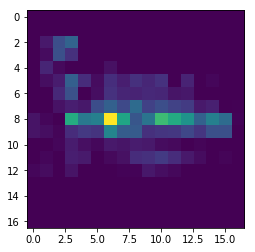

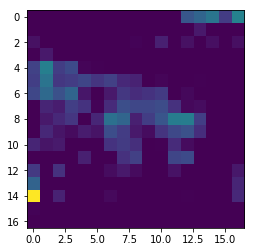

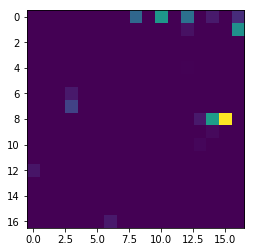

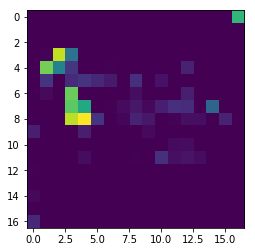

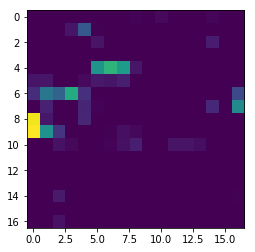

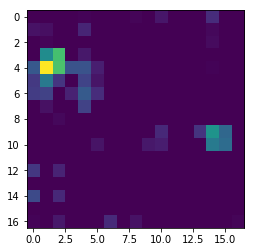

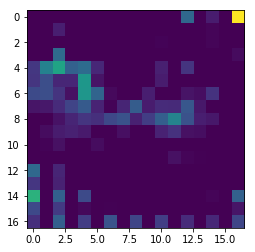

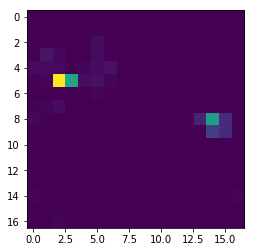

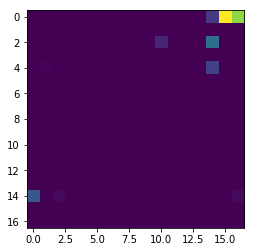

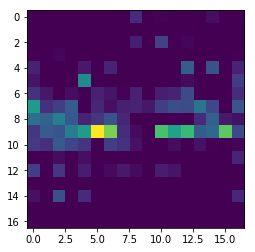

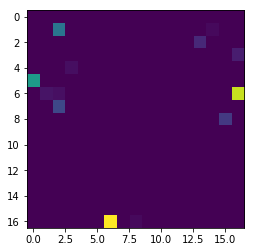

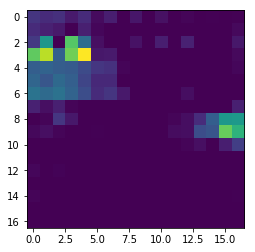

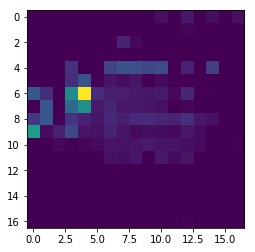

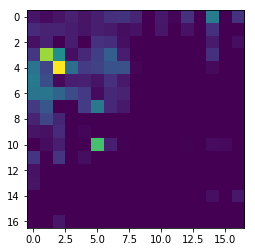

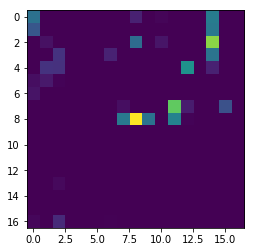

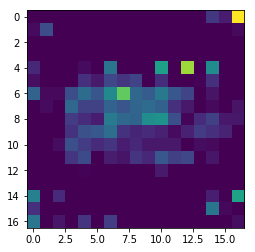

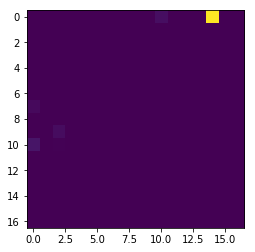

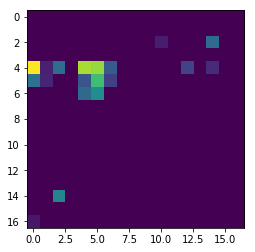

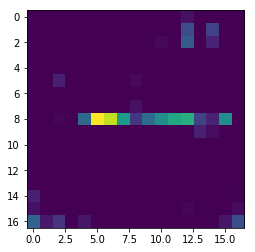

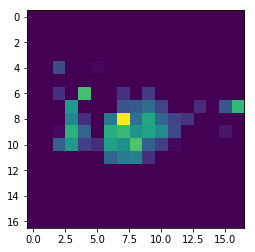

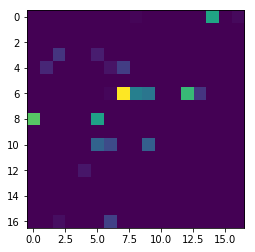

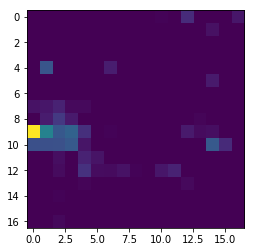

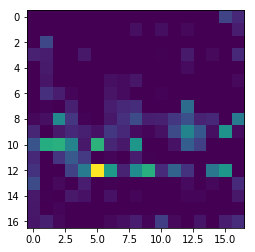

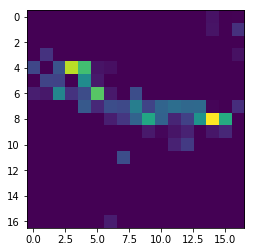

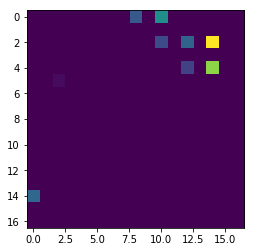

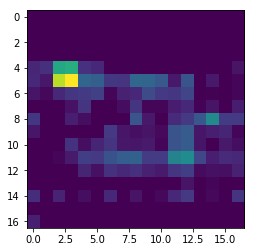

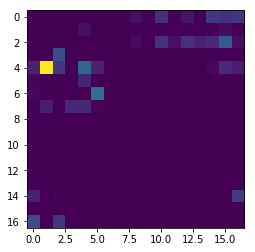

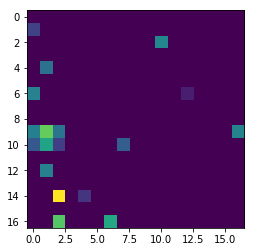

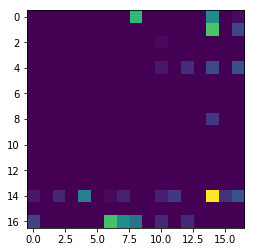

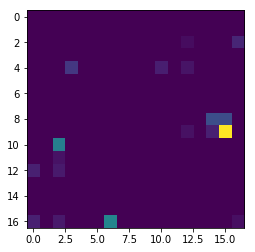

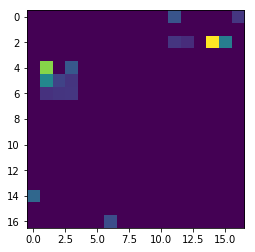

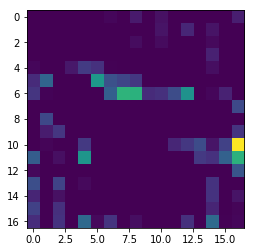

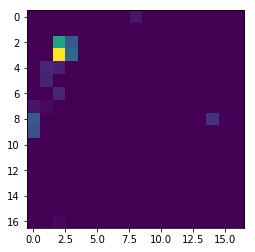

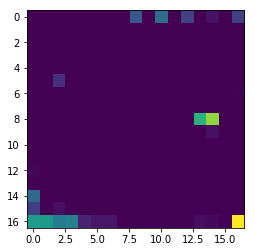

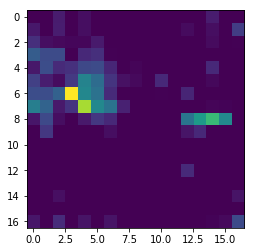

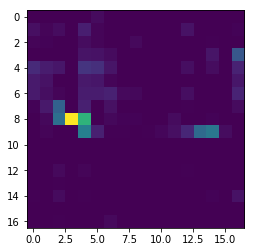

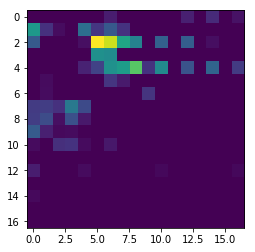

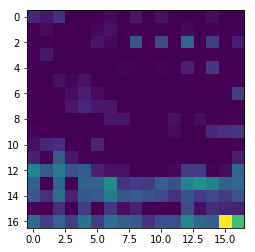

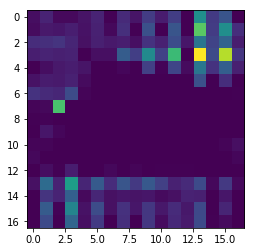

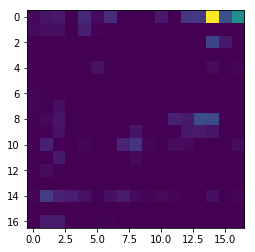

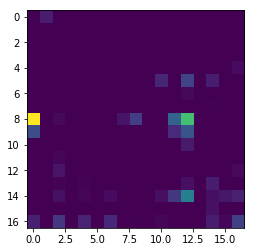

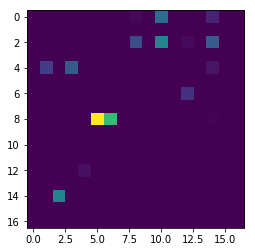

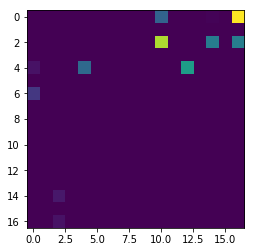

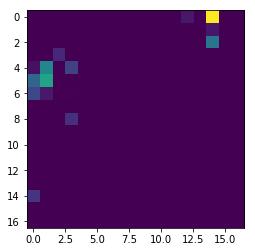

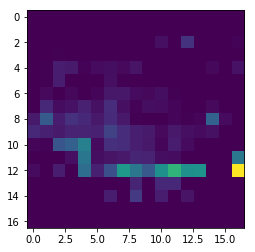

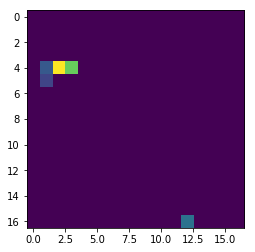

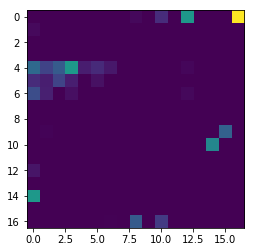

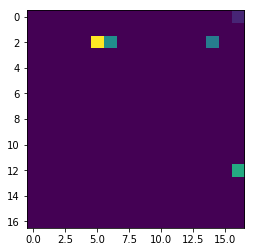

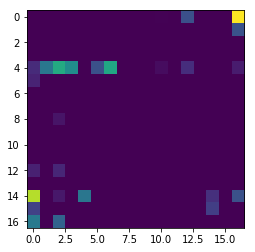

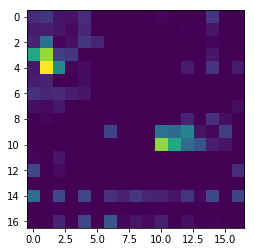

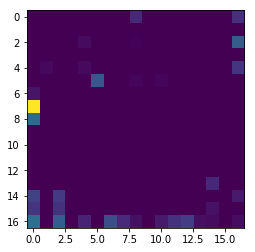

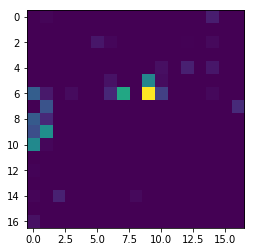

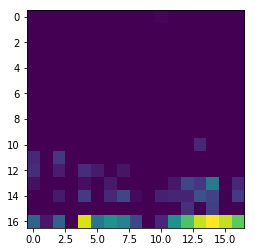

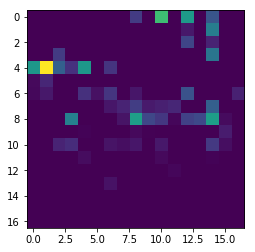

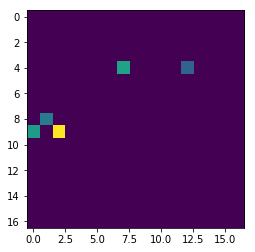

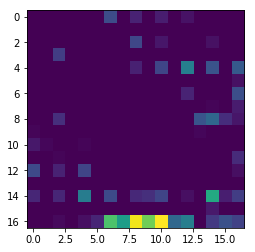

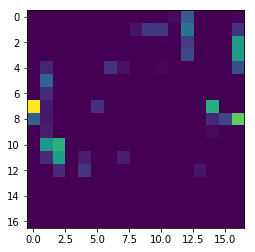

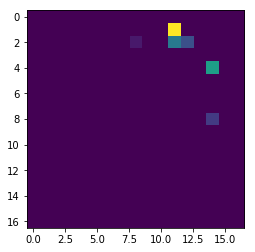

In [7]:
plt.imshow(raw_images[0,:,:,:])
plt.show()
import numpy as np
for j in range(272):
    plt.imshow(imgs_matrix[0,:,:,j])
    plt.show()

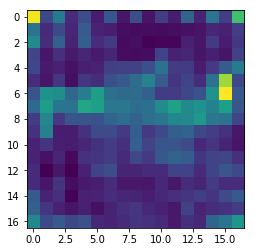

In [9]:
import numpy as np
plt.imshow(np.sum(imgs_matrix[0,:,:,272*3:272*4], 2))
plt.show()